<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logit-Grid-Search" data-toc-modified-id="Logit-Grid-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logit Grid Search</a></span></li></ul></div>

# 6_Logistic_Regression_Grid_Search

In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# importing module
import warnings
warnings.filterwarnings('ignore') # add specs for warnings filter

In [5]:
df = pd.read_csv('clean_churn.csv')

df.drop(['Unnamed: 0', 'T_D_Min', 'T_E_Min', 'T_N_Min', 'T_I_Min'], axis=1, inplace=True)

df.head()

x=df.drop(['Churned'], axis=1)
y=df.Churned

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

x_train.shape, x_test.shape

((3750, 13), (1250, 13))

## Logit Grid Search

In [7]:
import time
start = time.perf_counter()

grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
         'C' : np.logspace(-4, 4, 40),
         'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
         'max_iter' : [100, 1000]
        }
logreg = LogisticRegression(verbose=0)
logreg_cv = GridSearchCV(logreg, grid, cv=3, verbose=0)
logreg_cv.fit(x_train, y_train)

print('\nBest hyperparameters:', logreg_cv.best_params_)
print('\nAccuracy:', logreg_cv.best_score_)

stop = time.perf_counter()
print(f'\nDetermined grid search in {stop - start:0.4f} seconds.')


Best hyperparameters: {'C': 142.51026703029964, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy: 0.8656

Determined grid search in 189.5660 seconds.


[[1038   37]
 [ 143   32]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1075
           1       0.46      0.18      0.26       175

    accuracy                           0.86      1250
   macro avg       0.67      0.57      0.59      1250
weighted avg       0.82      0.86      0.83      1250


Run time 0.9326 seconds.


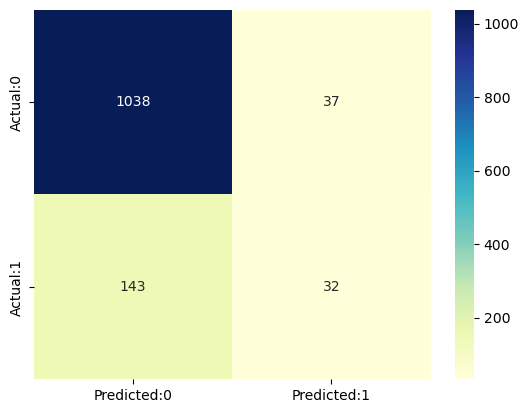

In [13]:
import time

start = time.perf_counter()

logreg = LogisticRegression(penalty='l2',
                            dual=False,
                            tol=0.0001,
                            C=142.510,
                            fit_intercept=True,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='lbfgs',
                            max_iter=1000,
                            multi_class='auto',
                            verbose=0,
                            warm_start=False,
                            n_jobs=10,
                            l1_ratio=None)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

stop = time.perf_counter()
print(f'\nRun time {stop - start:0.4f} seconds.')